In [1]:
import astropy.units as u
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from tdsat_telescope import load_qe, load_reflectivity, load_redfilter, apply_filters
from duet_filters import optimize_filter, make_red_filter
from apply_transmission import apply_trans
from zodi import load_airglow, load_zodi
import astropy.units as u

In [3]:
target = 0.5

Target out-of-band 0.000251301119952685
0.5000135085949773


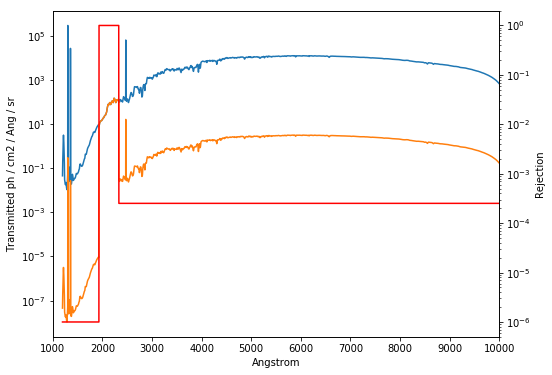

In [4]:
# Band 1
zodi = load_zodi(scale=77)
low_wave = 193*u.nm
high_wave = 233*u.nm
rejection = optimize_filter(low_wave, high_wave, blue_filter=True, target_ratio=target)
print('Target out-of-band {}'.format(rejection))
ref_wave, reflectivity = load_reflectivity()
qe_wave, qe = load_qe()
red_filter = make_red_filter(zodi['wavelength'], low_wave = low_wave,
                             high_wave=high_wave, rejection = rejection,
                             blue_filter=True)
#     # Apply reflectivity
ref_flux = apply_trans(zodi['wavelength'], zodi['flux'], ref_wave, reflectivity/100.)
qe_flux = apply_trans(zodi['wavelength'], ref_flux, qe_wave, qe)
band_flux = apply_trans(zodi['wavelength'], qe_flux, zodi['wavelength'], red_filter)


in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print(out_of_band / in_band)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()

ax.set_yscale('Log')
ax.plot(zodi['wavelength'], qe_flux)
ax.plot(zodi['wavelength'], band_flux)


ax.set_xlabel(zodi['wavelength'].unit)
ax.set_ylabel('Transmitted ph / cm2 / Ang / sr')


ax.set_xlim([1e3, 10e3])


ax2 = ax.twinx()
ax2.plot(zodi['wavelength'], red_filter, color = 'red')
ax2.set_yscale('Log')
ax2.set_ylabel('Rejection')


plt.show()


Target out-of-band 0.0023032466301754788
0.5000000000000001


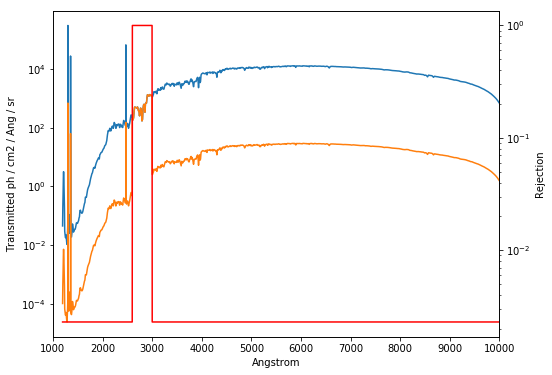

In [5]:
# Band 2
zodi = load_zodi(scale=77)
low_wave = 260*u.nm
high_wave = 300*u.nm
rejection = optimize_filter(low_wave, high_wave, blue_filter=False, target_ratio=target)
print('Target out-of-band {}'.format(rejection))


ref_wave, reflectivity = load_reflectivity()
qe_wave, qe = load_qe()
red_filter = make_red_filter(zodi['wavelength'], low_wave = low_wave,
                             high_wave=high_wave, rejection = rejection,
                             blue_filter=False)
#     # Apply reflectivity
ref_flux = apply_trans(zodi['wavelength'], zodi['flux'], ref_wave, reflectivity/100.)
qe_flux = apply_trans(zodi['wavelength'], ref_flux, qe_wave, qe)
band_flux = apply_trans(zodi['wavelength'], qe_flux, zodi['wavelength'], red_filter)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print(out_of_band / in_band)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()

ax.set_yscale('Log')
ax.plot(zodi['wavelength'], qe_flux)
ax.plot(zodi['wavelength'], band_flux)


ax.set_xlabel(zodi['wavelength'].unit)
ax.set_ylabel('Transmitted ph / cm2 / Ang / sr')


ax.set_xlim([1e3, 10e3])


ax2 = ax.twinx()
ax2.plot(zodi['wavelength'], red_filter, color = 'red')
ax2.set_yscale('Log')
ax2.set_ylabel('Rejection')




plt.show()



0.40337056498487633


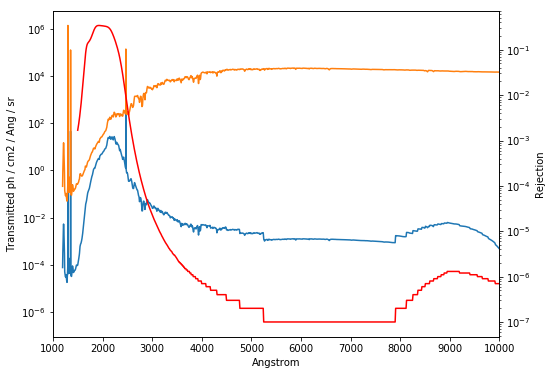

Average in-band transmission: 0.2627222589743589
Average in-band QE: 0.31440697435897436


In [12]:
# Band 1
zodi = load_zodi(scale=77)

band_flux = apply_filters(zodi['wavelength'], zodi['flux'], band=1)
#ref_wave, reflectivity = load_reflectivity()
low_wave = 193*u.nm
high_wave = 233*u.nm
#qe_wave, qe = load_qe()
# red_filter = make_red_filter(zodi['wavelength'], low_wave = low_wave,
#                              high_wave=high_wave, rejection = rejection,
#                              blue_filter=True)
red_wave, red_trans = load_redfilter(band=1)
#     # Apply reflectivity
#ref_flux = apply_trans(zodi['wavelength'], zodi['flux'], ref_wave, reflectivity/100.)
#qe_flux = apply_trans(zodi['wavelength'], ref_flux, qe_wave, qe)
#band_flux = apply_trans(zodi['wavelength'], qe_flux, red_wave, red_trans)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print(out_of_band / in_band)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()

ax.set_yscale('Log')
#ax.plot(zodi['wavelength'], qe_flux)
ax.plot(zodi['wavelength'], band_flux)
ax.plot(zodi['wavelength'], zodi['flux'])



ax.set_xlabel(zodi['wavelength'].unit)
ax.set_ylabel('Transmitted ph / cm2 / Ang / sr')


ax.set_xlim([1e3, 10e3])


ax2 = ax.twinx()
ax2.plot(red_wave.to(u.AA), red_trans, color = 'red')

ax2.set_yscale('Log')
ax2.set_ylabel('Rejection')




plt.show()

in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))



4.481382455897317


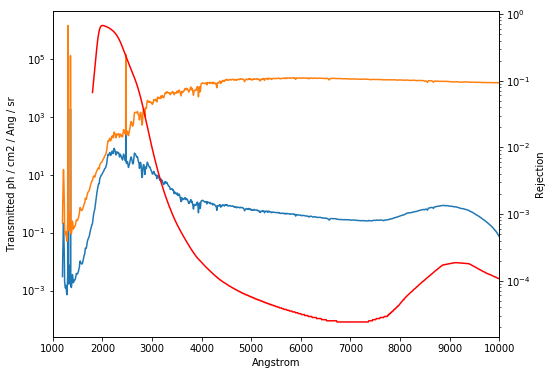

Average in-band transmission: 0.592534717948718
Average in-band QE: 0.31440697435897436


In [13]:
# Band 1
zodi = load_zodi(scale=77)

band_flux = apply_filters(zodi['wavelength'], zodi['flux'], band=1, light=True)
#ref_wave, reflectivity = load_reflectivity()
low_wave = 193*u.nm
high_wave = 233*u.nm
#qe_wave, qe = load_qe()
# red_filter = make_red_filter(zodi['wavelength'], low_wave = low_wave,
#                              high_wave=high_wave, rejection = rejection,
#                              blue_filter=True)
red_wave, red_trans = load_redfilter(band=1, light=True)
#     # Apply reflectivity
#ref_flux = apply_trans(zodi['wavelength'], zodi['flux'], ref_wave, reflectivity/100.)
#qe_flux = apply_trans(zodi['wavelength'], ref_flux, qe_wave, qe)
#band_flux = apply_trans(zodi['wavelength'], qe_flux, red_wave, red_trans)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print(out_of_band / in_band)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()

ax.set_yscale('Log')
#ax.plot(zodi['wavelength'], qe_flux)
ax.plot(zodi['wavelength'], band_flux)
ax.plot(zodi['wavelength'], zodi['flux'])



ax.set_xlabel(zodi['wavelength'].unit)
ax.set_ylabel('Transmitted ph / cm2 / Ang / sr')


ax.set_xlim([1e3, 10e3])


ax2 = ax.twinx()
ax2.plot(red_wave.to(u.AA), red_trans, color = 'red')

ax2.set_yscale('Log')
ax2.set_ylabel('Rejection')




plt.show()

in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))



0.567622526846903
Average in-band transmission: 0.3575970666666667
Average in-band QE: 0.7426032051282051


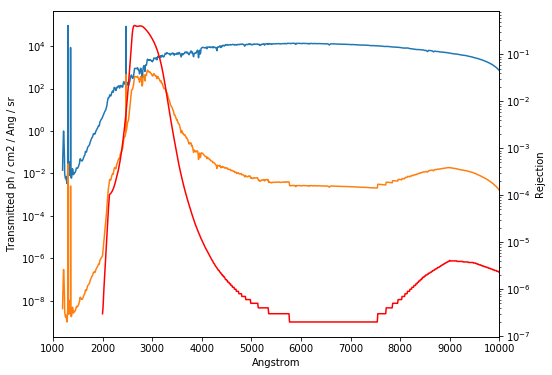

In [9]:
# Band 2
zodi = load_zodi(scale=77)
low_wave = 260*u.nm
high_wave = 300*u.nm
ref_wave, reflectivity = load_reflectivity()
qe_wave, qe = load_qe(band=2)
red_wave, red_trans = load_redfilter(band=2)
#     # Apply reflectivity
ref_flux = apply_trans(zodi['wavelength'], zodi['flux'], ref_wave, reflectivity/100.)
qe_flux = apply_trans(zodi['wavelength'], ref_flux, qe_wave, qe)
band_flux = apply_trans(zodi['wavelength'], qe_flux, red_wave, red_trans)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print(out_of_band / in_band)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()

ax.set_yscale('Log')
ax.plot(zodi['wavelength'], qe_flux)
ax.plot(zodi['wavelength'], band_flux)


ax.set_xlabel(zodi['wavelength'].unit)
ax.set_ylabel('Transmitted ph / cm2 / Ang / sr')


ax.set_xlim([1e3, 10e3])


ax2 = ax.twinx()
ax2.plot(red_wave.to(u.AA), red_trans, color = 'red')
ax2.set_yscale('Log')
ax2.set_ylabel('Rejection')


in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))


plt.show()



2.0430432469932445
Average in-band transmission: 0.5063422564102563
Average in-band QE: 0.7426032051282051


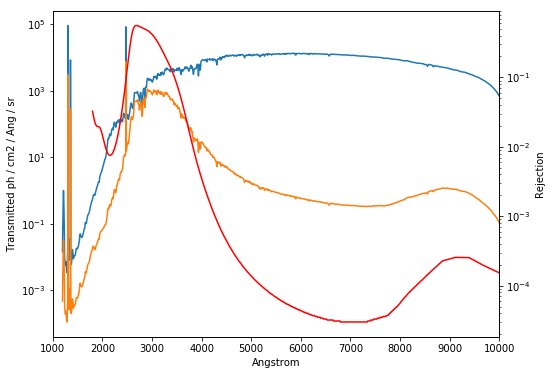

In [10]:
# Band 2
zodi = load_zodi(scale=77)
low_wave = 260*u.nm
high_wave = 300*u.nm
ref_wave, reflectivity = load_reflectivity()
qe_wave, qe = load_qe(band=2)
red_wave, red_trans = load_redfilter(band=2, light=True)
#     # Apply reflectivity
ref_flux = apply_trans(zodi['wavelength'], zodi['flux'], ref_wave, reflectivity/100.)
qe_flux = apply_trans(zodi['wavelength'], ref_flux, qe_wave, qe)
band_flux = apply_trans(zodi['wavelength'], qe_flux, red_wave, red_trans)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print(out_of_band / in_band)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()

ax.set_yscale('Log')
ax.plot(zodi['wavelength'], qe_flux)
ax.plot(zodi['wavelength'], band_flux)


ax.set_xlabel(zodi['wavelength'].unit)
ax.set_ylabel('Transmitted ph / cm2 / Ang / sr')


ax.set_xlim([1e3, 10e3])


ax2 = ax.twinx()
ax2.plot(red_wave.to(u.AA), red_trans, color = 'red')
ax2.set_yscale('Log')
ax2.set_ylabel('Rejection')


in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))


plt.show()


